In [1]:
#file for developing functions and other code

In [1]:
data_dir = "data/raw_training/training_data"

In [20]:
import librosa
import numpy as np

#PURPOSE:   load the spectrogram of a .wav audio file(s)
#PARAMS:    sample_rate         int     sample rate of the wav file
#           *wav_file           str     path(s) to the wav file(s)
#           print_spectrogram   Bool    [OPTIONAL] print the spectrogram: True OR False, default=False
#           title               str     [OPTIONAL] (if print_spectro=True) title of the printed spectrogram: str, default=None
#           y_type              str     [OPTIONAL] (if print_spectro=True) scale to use for the y axis: 'log' OR 'linear', default='log'
#RETURN:    ndarray     spectrogram of the wav file
def wav_to_spectro(sample_rate, *wav_file, print_spectrogram=False, title=None, y_type='log'):
    spectrograms = []
    for f in wav_file:
        waveform, sr = librosa.load(f, sr=sample_rate)
        x = librosa.stft(waveform)  #STFT of waveform
        x_db = librosa.amplitude_to_db(np.abs(x))   #map the magnitudes of x to a decibel scale

        if print_spectrogram:
            print_spectro(x_db, sample_rate, title = title, y_type=y_type)

        spectrograms.append(x_db)

    return tuple(spectrograms)

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

#PURPOSE:   print a spectrogram
#PARAMS:    spectrogram     ndarray     spectrogram to print
#           sample_rate     int         sample rate of the wav file
#           title           str         [OPTIONAL] title of the printed spectrogram: str, default=None
#           y_type          str         [OPTIONAL] scale to use for the y axis: 'log' OR 'linear', default='log'
def print_spectro(spectrogram, sample_rate, title=None, y_type='log'):
    fig, ax = plt.subplots()
    img = librosa.display.specshow(spectrogram, sr=sample_rate, x_axis='time', y_axis=y_type, ax=ax)
    if not title==None:
        ax.set(title=title)
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    

[[-25.846985  -15.115872   -6.7085342 ... -14.433814   -8.509474
    3.4592357]
 [ -3.0446782  -1.4880937  -3.694756  ... -13.682923  -12.938524
    1.8251474]
 [  2.9105973   2.2215447   2.471475  ...  -6.5906925 -12.835645
   -0.975742 ]
 ...
 [-23.995949  -30.725344  -39.965546  ... -32.76187   -31.2197
  -15.943803 ]
 [-23.011078  -28.14214   -39.965546  ... -36.95214   -29.86514
  -15.707228 ]
 [-22.543674  -27.109709  -39.965546  ... -39.965546  -29.054468
  -15.651861 ]]
<class 'numpy.ndarray'>


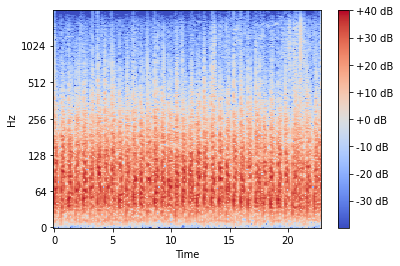

In [21]:
example = data_dir + "/9979_TV.wav"
spectrogram = wav_to_spectro(4000, example, print_spectrogram=True)
spec = spectrogram[0]
print(spec)
print(type(spec))

c:\Users\HP User\AppData\Local\Programs\Python\Python39\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


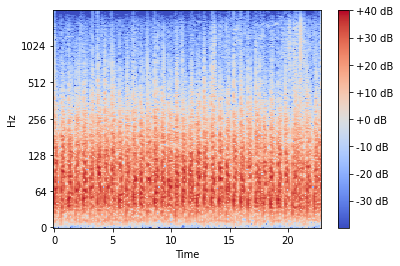

In [2]:
import helpers.audio_tools as adt

example = data_dir + "/9979_TV.wav"
spectrogram = adt.wav_to_spectro(example, 4000, print_spectrogram=True)

In [1]:
import helpers.input_processor as ip 
import helpers.alt_input_processor as altip
import helpers.audio_tools as adt 
import polars as pl

def load_training_data():
    data_dir = "data/raw_training/training_data"

    features = ['murmur'] #list of features to pass to ML model

    #load data into dataframe
    df = altip.ingestData_alt(data_dir)

    #get the spectrograms for each wav file, add as column to df
    df = df.explode('audio_files').with_column(
        pl.struct([pl.col('audio_files').str.replace(r"^", data_dir + '/').alias('file_paths'), 'sampling_frequency']) #specifiy the path to the wav files
        .apply(lambda x: adt.wav_to_spectro(x['file_paths'], x['sampling_frequency'])).alias('spectrogram') #call wav_to_spectro for each wav file
    )

    #get the spectrograms with the desired features
    out = df.select(pl.col(['spectrogram', *features]))

    return out

c:\Users\HP User\AppData\Local\Programs\Python\Python39\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Ingesting data from  data/raw_training/training_data
finished reading from file 9983_TV.wav
shape: (5, 2)
┌─────────────────────────────────────┬─────────┐
│ spectrogram                         ┆ murmur  │
│ ---                                 ┆ ---     │
│ object                              ┆ str     │
╞═════════════════════════════════════╪═════════╡
│ [[-33.758636   -28.780312   -21.... ┆ Present │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┤
│ [[ -3.7716618  -22.114952    -6.... ┆ Present │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┤
│ [[-15.812074   -14.747418   -25.... ┆ Present │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┤
│ [[ -2.2037256   -1.7094584   -9.... ┆ Present │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┤
│ [[ -6.8876595  -7.3768425 -25.21... ┆ Present │
└─────────────────────────────────────┴─────────┘


In [12]:
x = out.get_column('spectrogram')
y = out.get_column('murmur')
z = pl.concat([x,y])

SchemaError: cannot append Series; data types don't match

In [8]:
out = (df.select(pl.col(['patient_id', 'audio_files', 'spectrogram', 'height']).head()))
out = out.groupby('patient_id').agg_list()

print(out)

shape: (3, 4)
┌────────────┬────────────────────┬───────────────────────────┬──────────────────────────────┐
│ patient_id ┆ audio_files        ┆ spectrogram               ┆ height                       │
│ ---        ┆ ---                ┆ ---                       ┆ ---                          │
│ i64        ┆ list [str]         ┆ list [extension]          ┆ list [str]                   │
╞════════════╪════════════════════╪═══════════════════════════╪══════════════════════════════╡
│ 13918      ┆ ["13918_AV.wav",   ┆ [(array([[-33.758636  ,   ┆ ["98.0", "98.0", ... "98.0"] │
│            ┆ "13918_PV.wav",... ┆ -28.7803...               ┆                              │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 14998      ┆ ["14998_AV.wav",   ┆ [(array([[-7.3793726e+00, ┆ ["nan", "nan"]               │
│            ┆ "14998_PV.wav"]    ┆ -2.398...                 ┆                              │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌

In [3]:
import helpers.input_processor as ip 

features = []
data_dir = "data/raw_training/training_data"

data = ip.load_training_data(features, data_dir, None, encode=True)

Ingesting data from  data/raw_training/training_data
finished reading from file 9983_TV.wav


In [4]:
print(data.head())

shape: (5, 1)
┌─────────────────────────────────────┐
│ spectrogram                         │
│ ---                                 │
│ object                              │
╞═════════════════════════════════════╡
│ [[-33.758636   -28.780312   -21.... │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ [[ -3.7716618  -22.114952    -6.... │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ [[-15.812074   -14.747418   -25.... │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ [[ -2.2037256   -1.7094584   -9.... │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ [[ -6.8876595  -7.3768425 -25.21... │
└─────────────────────────────────────┘


In [1]:
import helpers.input_processor as ip 

data_dir = "data/raw_training/training_data"

x = ip.ingestData(data_dir, encode=True)

c:\Users\HP User\AppData\Local\Programs\Python\Python39\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Ingesting data from  data/raw_training/training_data
reading from file: 13918.txt
reading from file: 14241.txt
reading from file: 14998.txt
reading from file: 23625.txt
reading from file: 24160.txt
reading from file: 2530.txt
reading from file: 29045.txt
reading from file: 29378.txt
reading from file: 31737.txt
reading from file: 33151.txt
reading from file: 36327.txt
reading from file: 38337.txt
reading from file: 39043.txt
reading from file: 39403.txt
reading from file: 39456.txt
reading from file: 40058.txt
reading from file: 40798.txt
reading from file: 40840.txt
reading from file: 43852.txt
reading from file: 44514.txt
reading from file: 45843.txt
reading from file: 46065.txt
reading from file: 46532.txt
reading from file: 46579.txt
reading from file: 46778.txt
reading from file: 47002.txt
reading from file: 49558.txt
reading from file: 49561.txt
reading from file: 49562.txt
reading from file: 49568.txt
reading from file: 49572.txt
reading from file: 49574.txt
reading from file: 4

In [4]:
import polars as pl
print(x.head())

shape: (5, 26)
┌──────────┬────────────┬────────────┬───────────┬─────┬────────────┬─────────┬────────┬────────────┐
│ patient_ ┆ num_locati ┆ sampling_f ┆ audio_fil ┆ ... ┆ dia_mur_qu ┆ outcome ┆ campai ┆ additional │
│ id       ┆ ons        ┆ requency   ┆ es        ┆     ┆ ality      ┆ ---     ┆ gn     ┆ _id        │
│ ---      ┆ ---        ┆ ---        ┆ ---       ┆     ┆ ---        ┆ i64     ┆ ---    ┆ ---        │
│ i64      ┆ i64        ┆ i64        ┆ list      ┆     ┆ i64        ┆         ┆ str    ┆ str        │
│          ┆            ┆            ┆ [str]     ┆     ┆            ┆         ┆        ┆            │
╞══════════╪════════════╪════════════╪═══════════╪═════╪════════════╪═════════╪════════╪════════════╡
│ 13918    ┆ 4          ┆ 4000       ┆ ["13918_A ┆ ... ┆ null       ┆ 0       ┆ CC2015 ┆ nan        │
│          ┆            ┆            ┆ V.wav",   ┆     ┆            ┆         ┆        ┆            │
│          ┆            ┆            ┆ "13918_PV ┆     ┆           